In [2]:
# 1. Imports

import sys
import os
import torch
from torch.utils.data import DataLoader

# Add the parent directory to sys.path so Python can find the 'src' package
sys.path.append(os.path.abspath(os.path.join('..')))

from src.data_loading import APTOSDataset, get_default_transforms
from src.train import get_model
from src.metrics import compute_predictions, plot_confusion_matrix, print_classification_report

In [3]:
# 2. Configs

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
# 3. Upload dataset

dataset = APTOSDataset(
    csv_path="../data/raw/train.csv",
    images_dir="../data/raw/train_images",
    transform=get_default_transforms()
)

loader = DataLoader(dataset, batch_size=32, shuffle=False)

In [6]:
# 4. Upload trained model

model = get_model().to(device)
model.load_state_dict(torch.load("../models/baseline_resnet18.pth", map_location=device))

<All keys matched successfully>

In [7]:
# 5. Predictions

y_pred, y_true = compute_predictions(model, loader, device)

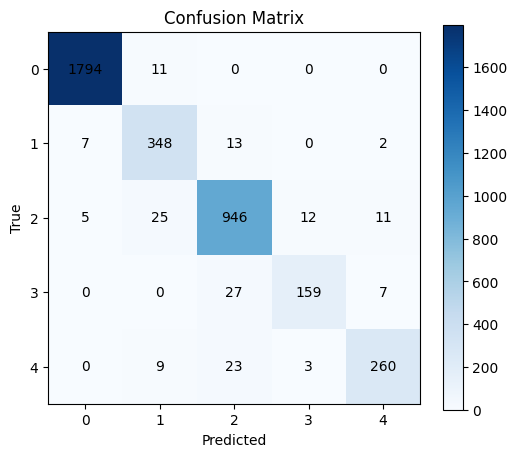

In [8]:
# 6. Confusion matrix

plot_confusion_matrix(y_true, y_pred, classes=[0,1,2,3,4])

In [9]:
# 7. Classification report

print_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1805
           1       0.89      0.94      0.91       370
           2       0.94      0.95      0.94       999
           3       0.91      0.82      0.87       193
           4       0.93      0.88      0.90       295

    accuracy                           0.96      3662
   macro avg       0.93      0.92      0.92      3662
weighted avg       0.96      0.96      0.96      3662

